In [15]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit import Aer
from qiskit import execute
from qiskit.visualization import plot_histogram


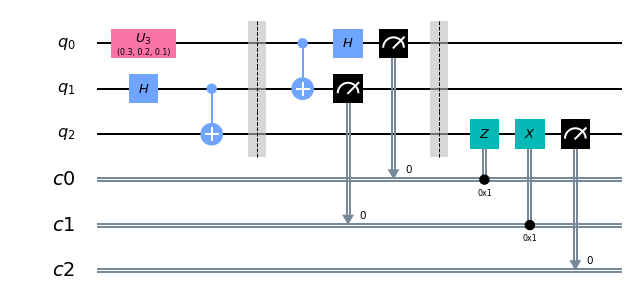

In [16]:
# Create elements
q = QuantumRegister(3, "q")
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
c2 = ClassicalRegister(1, "c2")
qc = QuantumCircuit(q, c0, c1, c2, name="teleport")

# Initial state
qc.u3(0.3, 0.2, 0.1, q[0])

# Prepare a Bell pair
qc.h(q[1])
qc.cx(q[1], q[2])

# Barrier following state preparation
qc.barrier(q)

# Measure in the Bell basis
qc.cx(q[0], q[1])
qc.h(q[0])

qc.measure(q[0], c0[0])
qc.measure(q[1], c1[0])

# Correction
qc.barrier(q)
qc.z(q[2]).c_if(c0, 1)
qc.x(q[2]).c_if(c1, 1)
qc.measure(q[2], c2[0])

qc.draw(output='mpl')

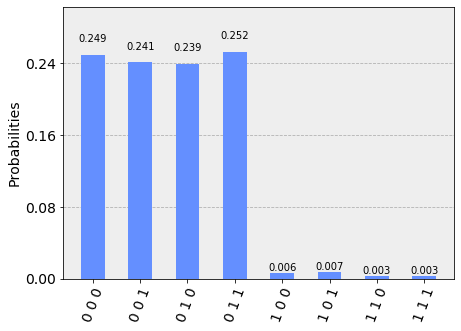

In [17]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)

plot_histogram(counts)